# Exploración de datos

## Cargue de librerias y parametros

In [78]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Agrega la ruta del directorio 'src' al path

sys.path.append(os.path.abspath('../src'))

# Importar módulos personalizados:

from procesamiento_datos import *

Función de procesamiento de datos cargadas correctamente.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Definición de rutas:

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
datos_raw = "..//data/raw/"
datos_processed = "..//data/processed/"

## Cargue de los dataframes

## Revisión Inicial dataframes
---
### Histórico de Facturas

Este informe reúne el detalle de todas las facturas emitidas desde **enero de 2018 hasta junio de 2025**.  
La información incluye:  

- **Fecha de emisión y vencimiento** de cada factura.  
- **Estado de la factura** con corte al **30 de junio de 2025**.  
- **Valor total facturado** y **saldo pendiente de pago**.  
- En caso de existir abonos, se especifica el **valor pagado** y la **fecha del pago**.  

Gracias a este histórico podemos:  

- Identificar **hábitos de pago** de cada cliente.  
- Reconocer **patrones de cumplimiento** y posibles retrasos.  
- Contar con una base sólida para una **gestión financiera y de cobranza más eficiente**.  

En pocas palabras, este reporte nos ofrece una visión clara y práctica para entender cómo nuestros clientes manejan sus compromisos de pago a lo largo del tiempo.  


In [10]:
# Cargue del histórico de facturas:

df_facturas = cargar_datos(datos_raw + "Historico_Facturas.csv")

df_facturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61393 entries, 0 to 61392
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nro_factura       61393 non-null  int64  
 1   NIT               61393 non-null  object 
 2   Fecha_expedicion  61393 non-null  object 
 3   Total_factura     61393 non-null  float64
 4   Saldo             61393 non-null  float64
 5   Estado            61393 non-null  object 
 6   Valor_pagado      60598 non-null  float64
 7   Fecha_pago        60598 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 3.7+ MB


In [11]:
convertir_fecha(df_facturas,['Fecha_expedicion','Fecha_pago'])
df_facturas.head()

,Nro_factura,NIT,Fecha_expedicion,Total_factura,Saldo,Estado,Valor_pagado,Fecha_pago
0,186537,42ecd8cb62d29625ad81914f17a48c219acb5d2be2daf0...,2025-06-18,1035398.0,1035398.0,CONFIRMADA,NaN,NaT
1,177214,46f7f7e4cdea7bc958d0999864222c63474cbd4f9751be...,2024-08-28,773500.0,0.0,PAGADA,773500.0,2024-09-06
2,161840,727d72342d46d4357539ec474dae79ce388234624a74d7...,2022-11-25,11900000.0,0.0,PAGADA,11900000.0,2022-11-30
3,161841,c1d637e1f5632d028983dbc5a46b8ea1dcae5a7aee1331...,2022-11-25,11900000.0,0.0,PAGADA,11900000.0,2022-11-30
4,177216,bec0e3be4b4d494a8b98d121499d2ff4d8bae3cdb5526b...,2024-08-28,773500.0,0.0,PAGADA,773500.0,2024-09-06


In [12]:
revision_inicial(df_facturas)

Cantidad de observaciones: 61393
Primeras filas del DataFrame:
   Nro_factura                                                NIT  \
0       186537  42ecd8cb62d29625ad81914f17a48c219acb5d2be2daf0...   
1       177214  46f7f7e4cdea7bc958d0999864222c63474cbd4f9751be...   
2       161840  727d72342d46d4357539ec474dae79ce388234624a74d7...   
3       161841  c1d637e1f5632d028983dbc5a46b8ea1dcae5a7aee1331...   
4       177216  bec0e3be4b4d494a8b98d121499d2ff4d8bae3cdb5526b...   

  Fecha_expedicion  Total_factura      Saldo      Estado  Valor_pagado  \
0       2025-06-18      1035398.0  1035398.0  CONFIRMADA           NaN   
1       2024-08-28       773500.0        0.0      PAGADA      773500.0   
2       2022-11-25     11900000.0        0.0      PAGADA    11900000.0   
3       2022-11-25     11900000.0        0.0      PAGADA    11900000.0   
4       2024-08-28       773500.0        0.0      PAGADA      773500.0   

  Fecha_pago  
0        NaT  
1 2024-09-06  
2 2022-11-30  
3 2022-11-30  
4 

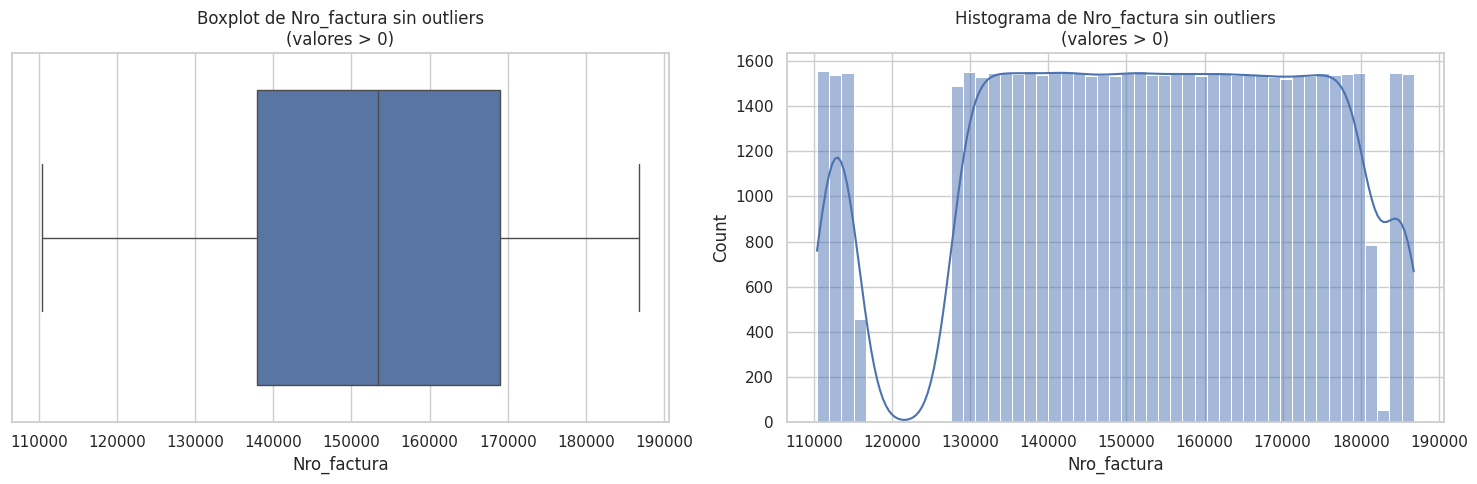

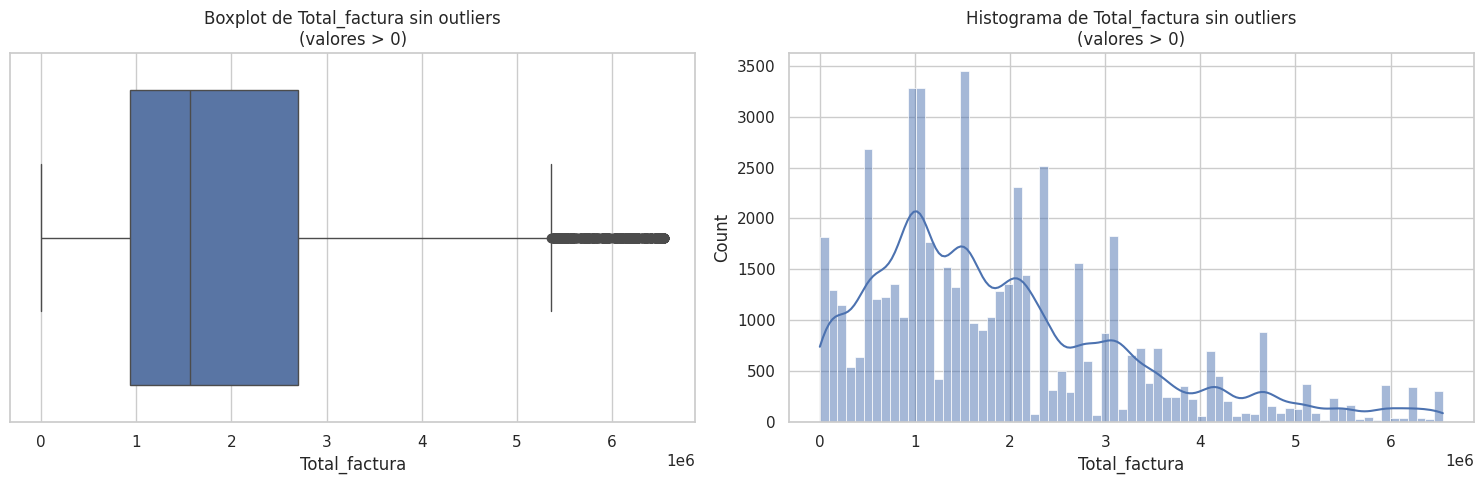

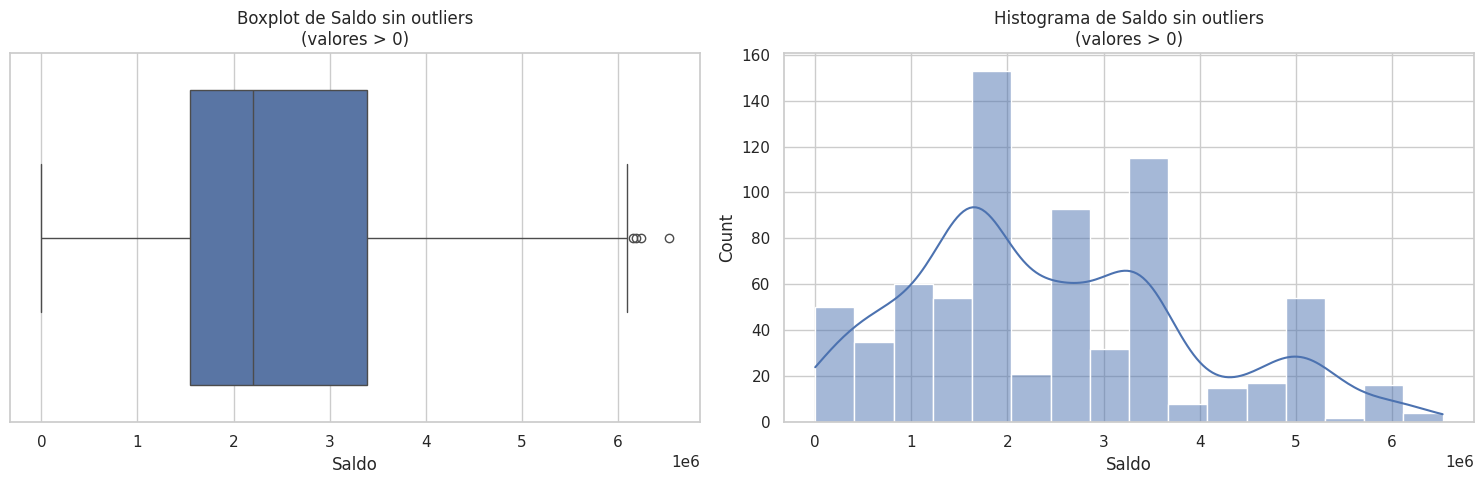

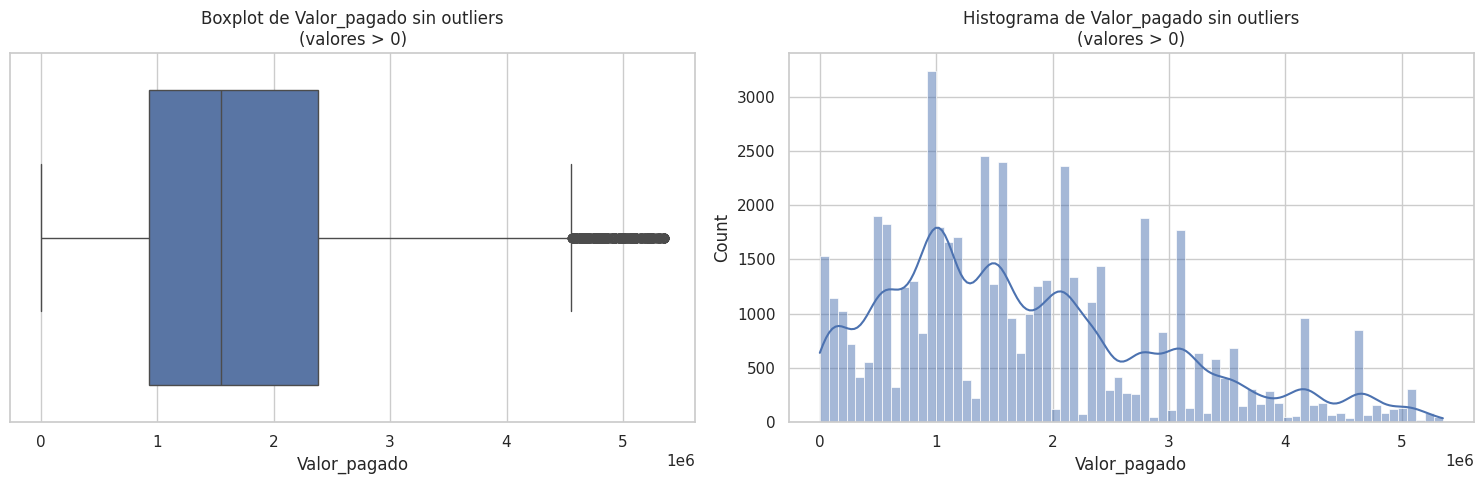

In [13]:
visualizar_distribucion(df_facturas, outliers=False)

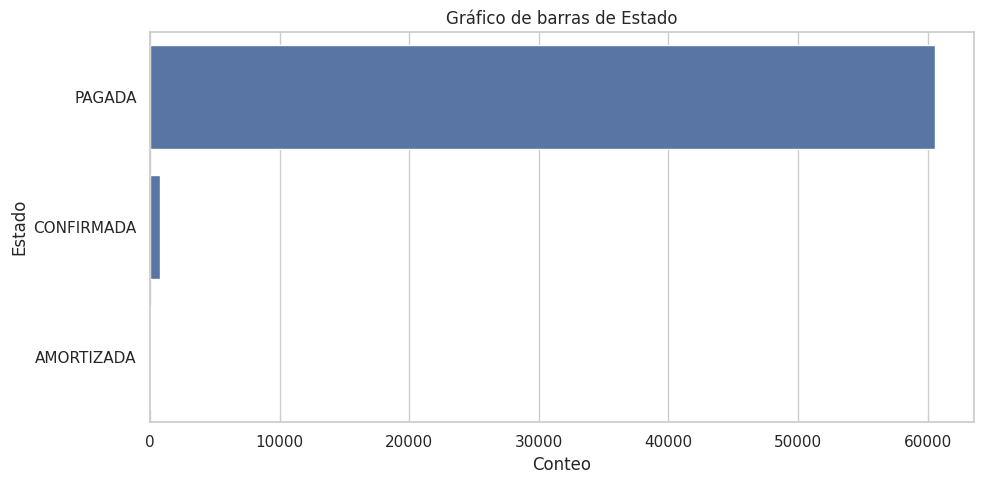

In [14]:
visualizar_categoricas(df_facturas, ['Estado'])

### Caracterización clientes



In [56]:
df_clientes = cargar_datos(datos_raw+"Informacion_Clientes.csv")
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NIT                        2697 non-null   object 
 1   PERIODO                    2697 non-null   object 
 2   FECHA_CORTE                2697 non-null   object 
 3   ACTIVOS_CORRIENTES         2697 non-null   float64
 4   GANANCIAS                  2697 non-null   float64
 5   PATRIMONIO                 2697 non-null   float64
 6   TOTAL_ACTIVOS              2697 non-null   float64
 7   ACTIVOS_NO_CORRIENTES      2697 non-null   float64
 8   PASIVOS_NO_CORRIENTES      2697 non-null   float64
 9   TOTAL_PASIVOS              2697 non-null   float64
 10  VAR_ACTIVOS_CORRIENTES     2697 non-null   float64
 11  VAR_GANANCIAS              2696 non-null   float64
 12  VAR_PATRIMONIO             2697 non-null   float64
 13  VAR_ACTIVOS                2697 non-null   float

In [57]:
convertir_fecha(df_clientes,['FECHA_CORTE'])
revision_inicial(df_clientes)

Cantidad de observaciones: 2697
Primeras filas del DataFrame:
                                                 NIT         PERIODO  \
0  42ecd8cb62d29625ad81914f17a48c219acb5d2be2daf0...  Periodo Actual   
1  46f7f7e4cdea7bc958d0999864222c63474cbd4f9751be...  Periodo Actual   
2  727d72342d46d4357539ec474dae79ce388234624a74d7...  Periodo Actual   
3  c1d637e1f5632d028983dbc5a46b8ea1dcae5a7aee1331...  Periodo Actual   
4  bec0e3be4b4d494a8b98d121499d2ff4d8bae3cdb5526b...  Periodo Actual   

  FECHA_CORTE  ACTIVOS_CORRIENTES  GANANCIAS  PATRIMONIO  TOTAL_ACTIVOS  \
0  2024-12-31           3124410.0  4689665.0   5333066.0      8298725.0   
1  2024-12-31           2610192.0  3212577.0   3490463.0      4055185.0   
2  2024-12-31          14873094.0   178569.0  72520148.0    176408761.0   
3  2024-12-31           4777075.0  2626352.0   4706011.0     10919327.0   
4  2024-12-31           2285184.0   389016.0   1066601.0      3228635.0   

   ACTIVOS_NO_CORRIENTES  PASIVOS_NO_CORRIENTES  TOTAL

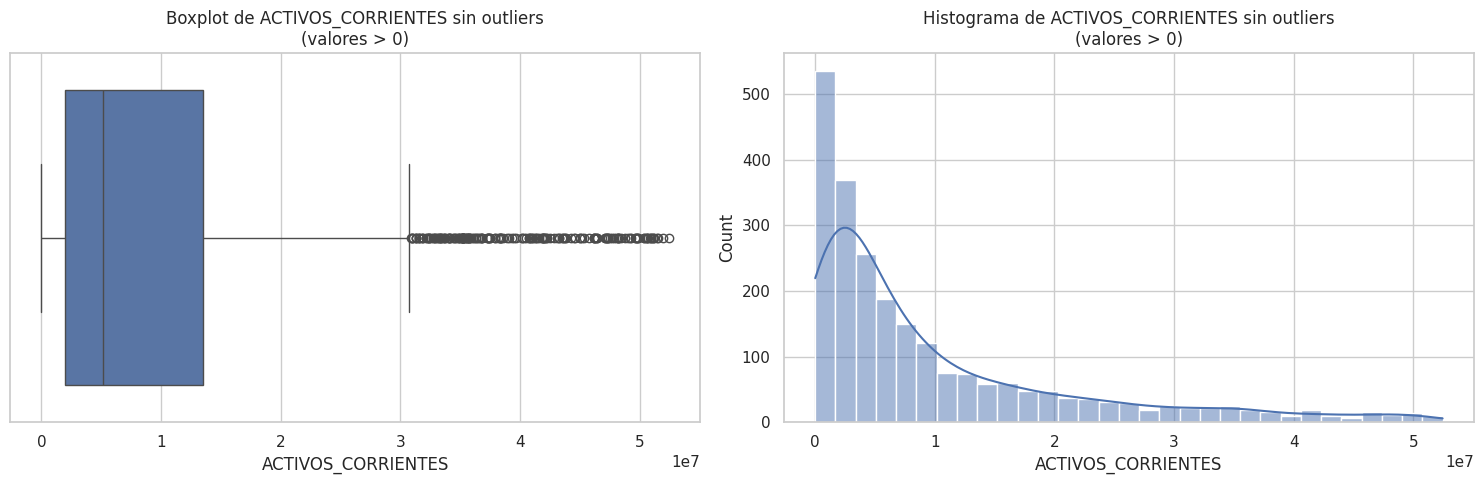

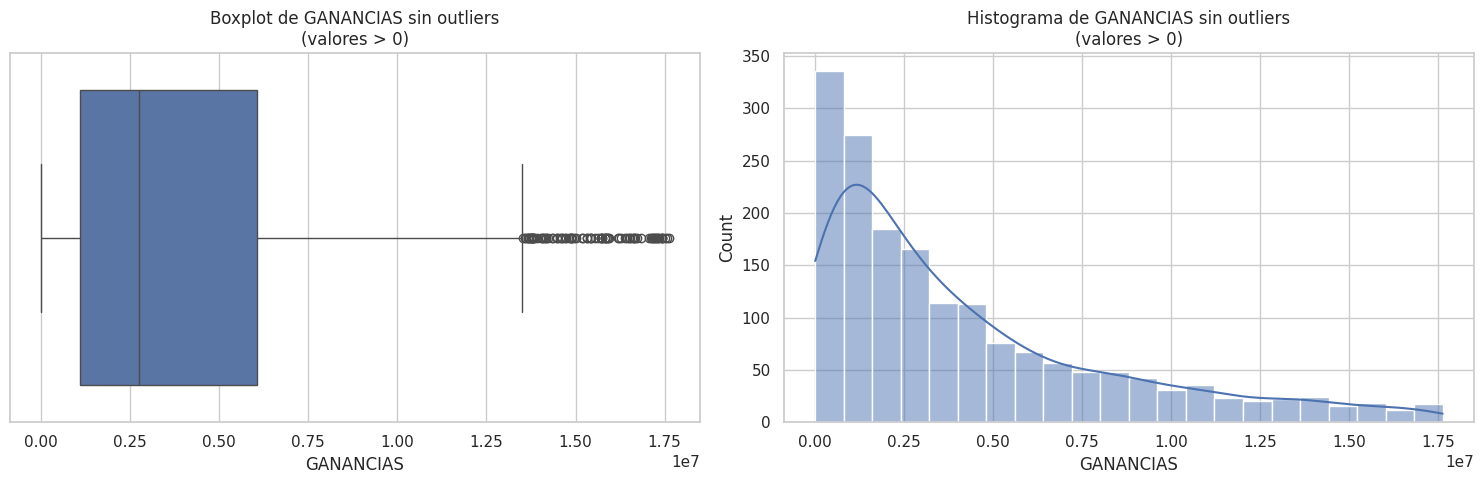

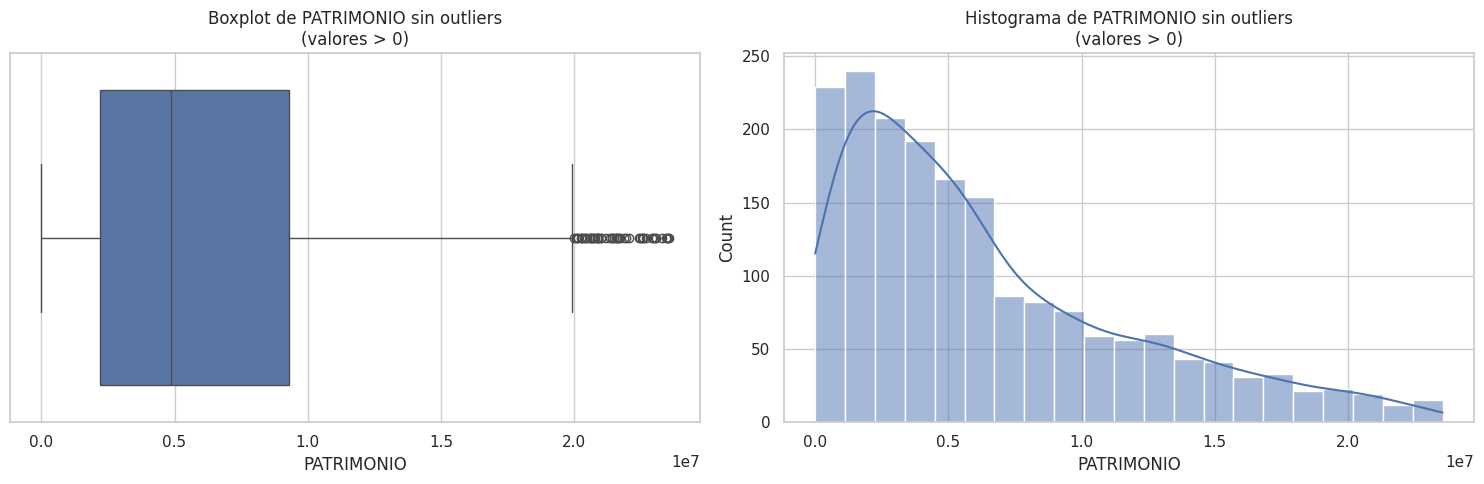

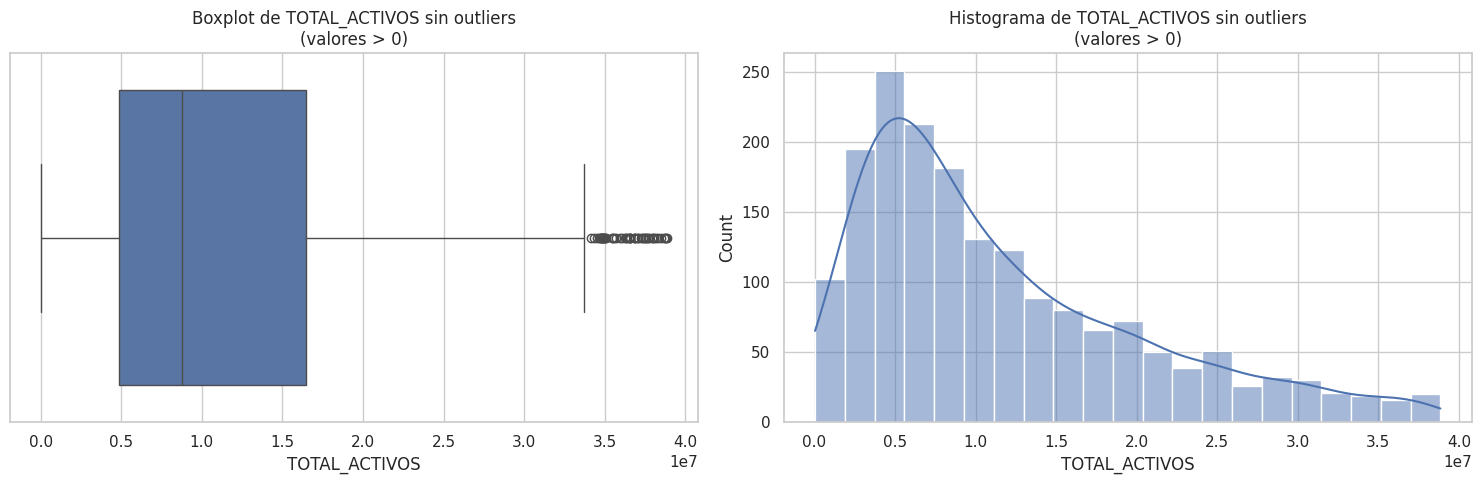

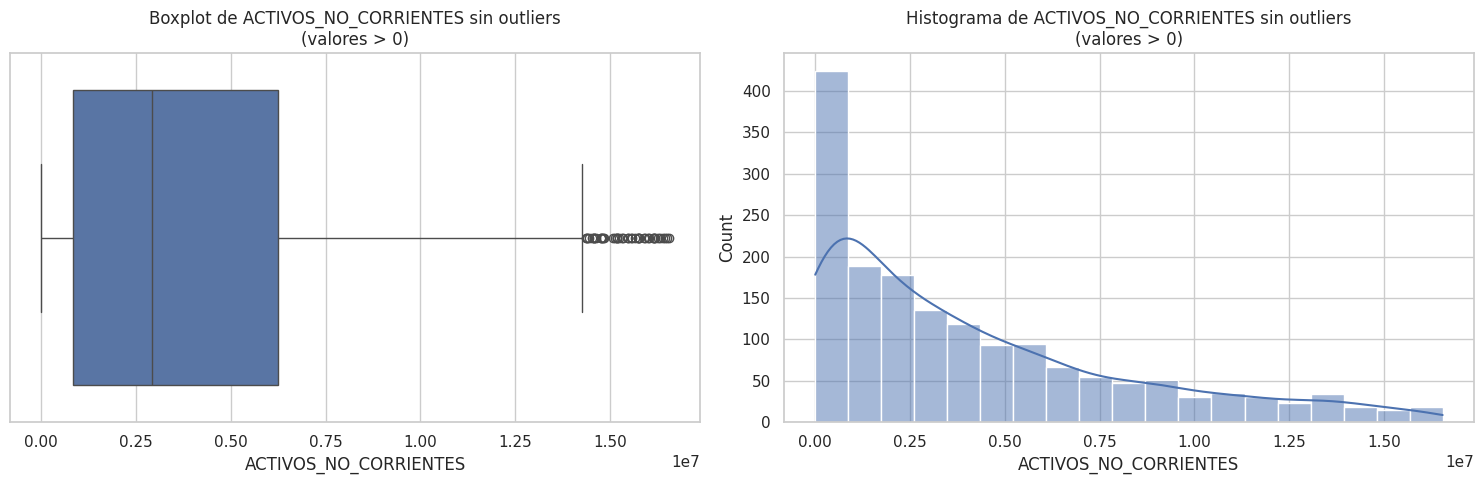

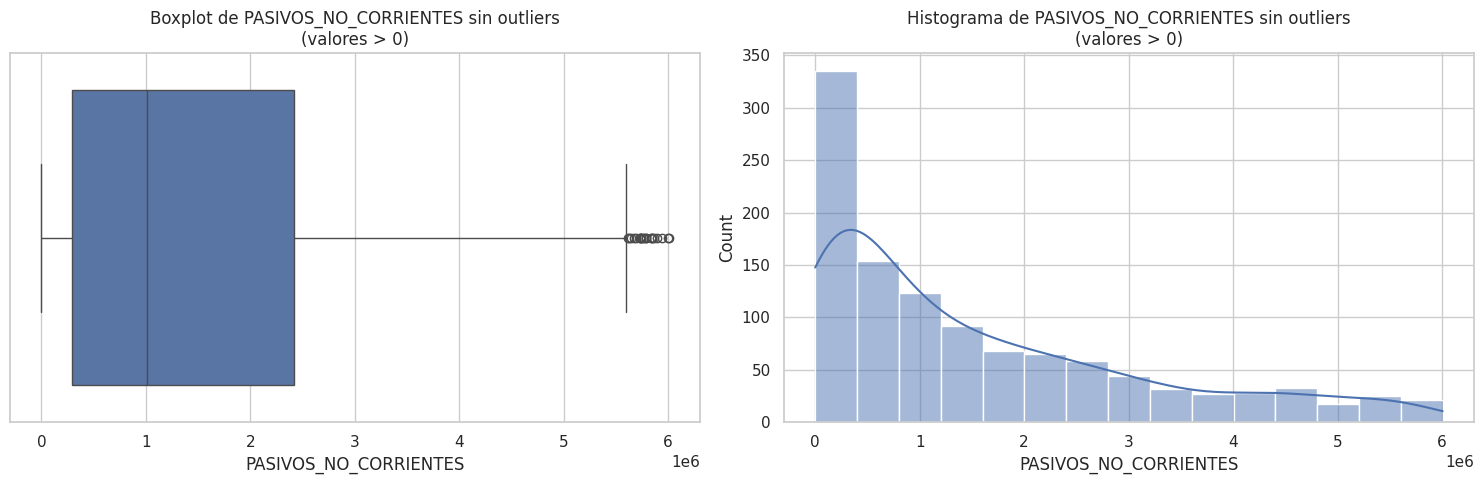

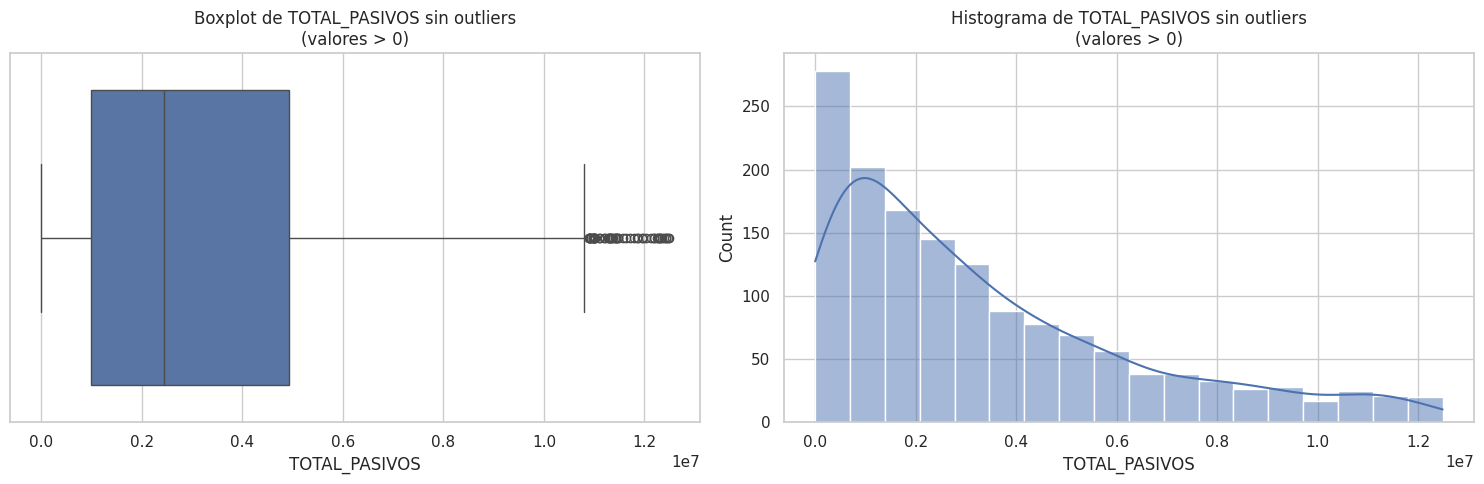

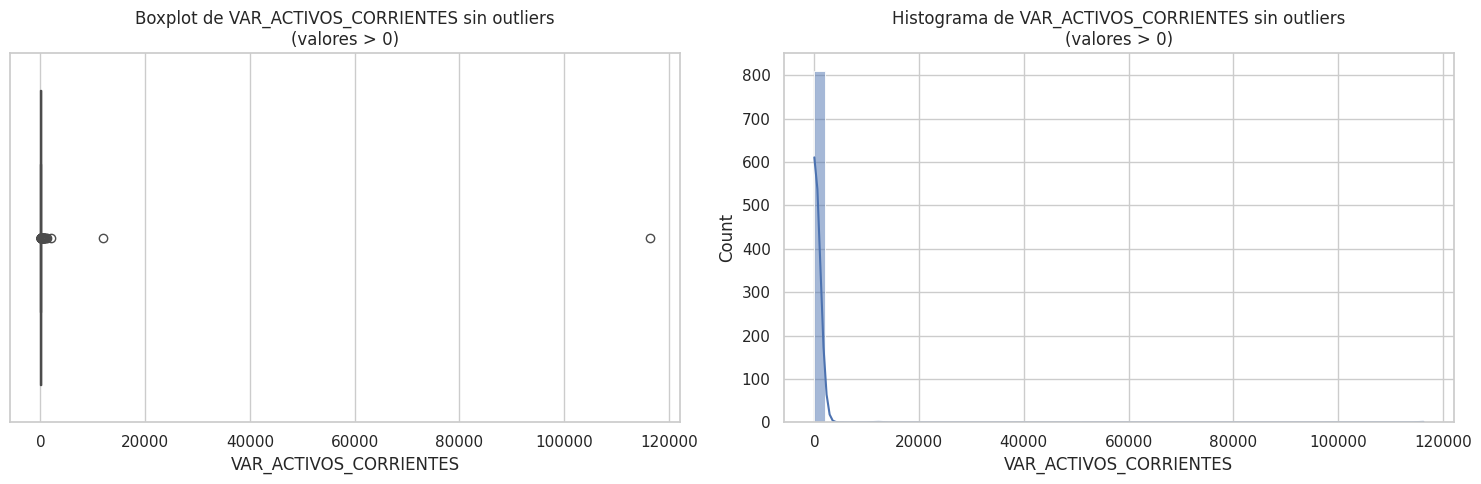

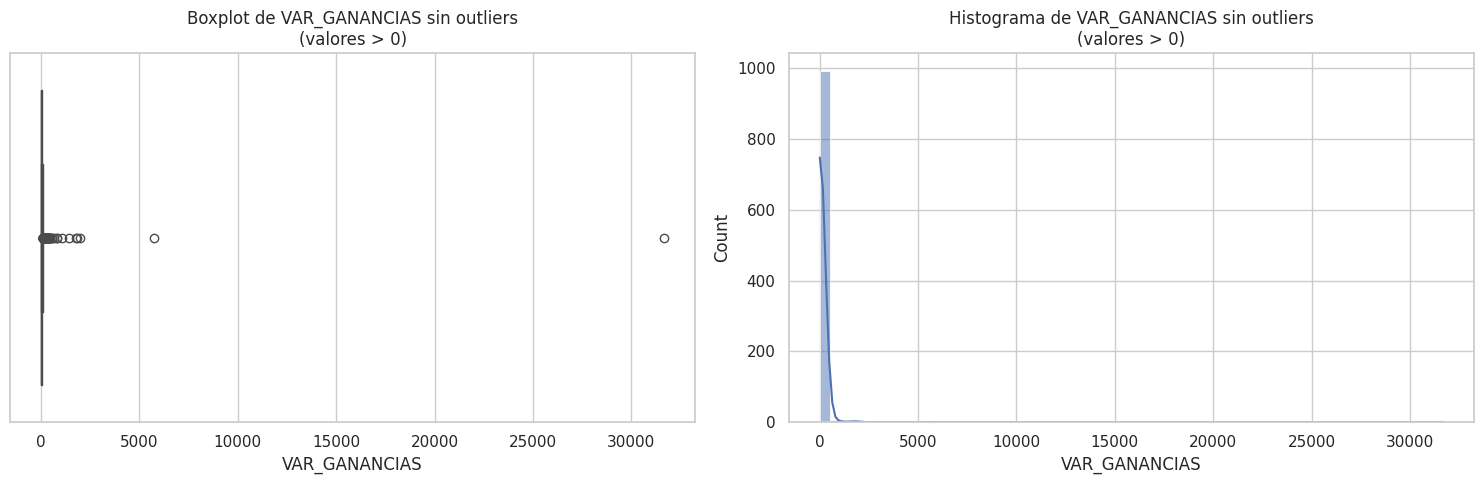

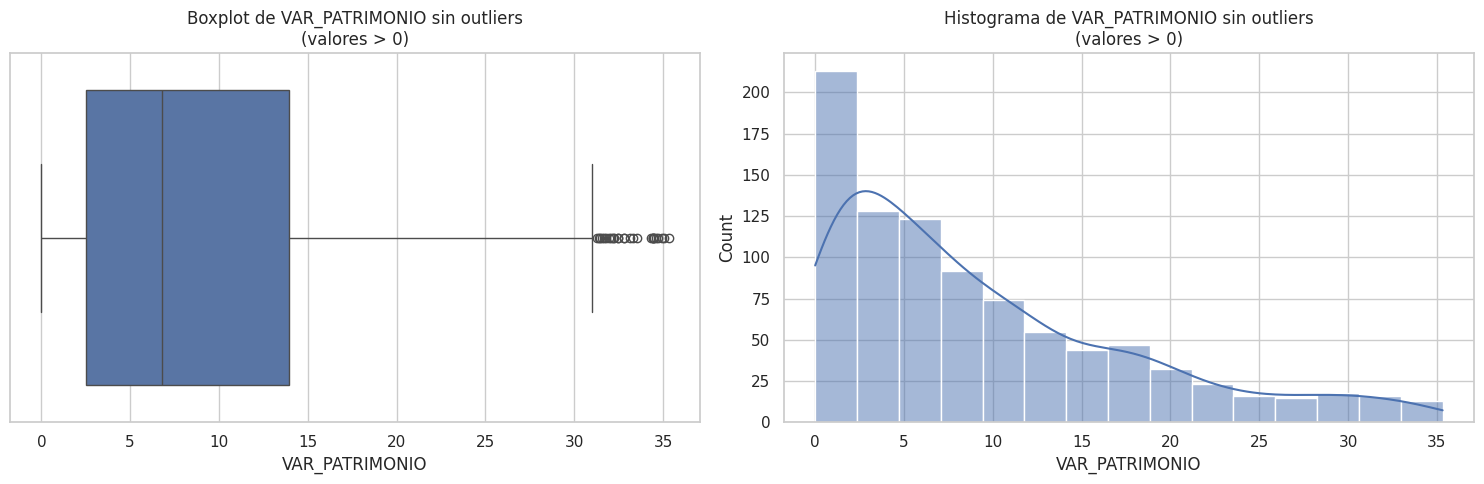

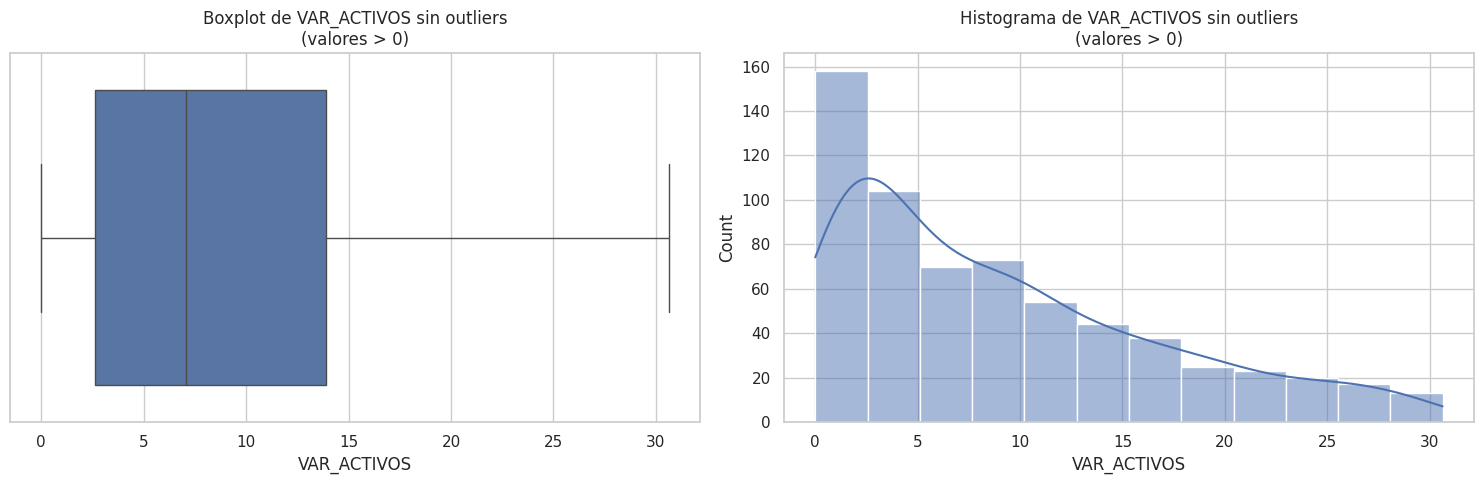

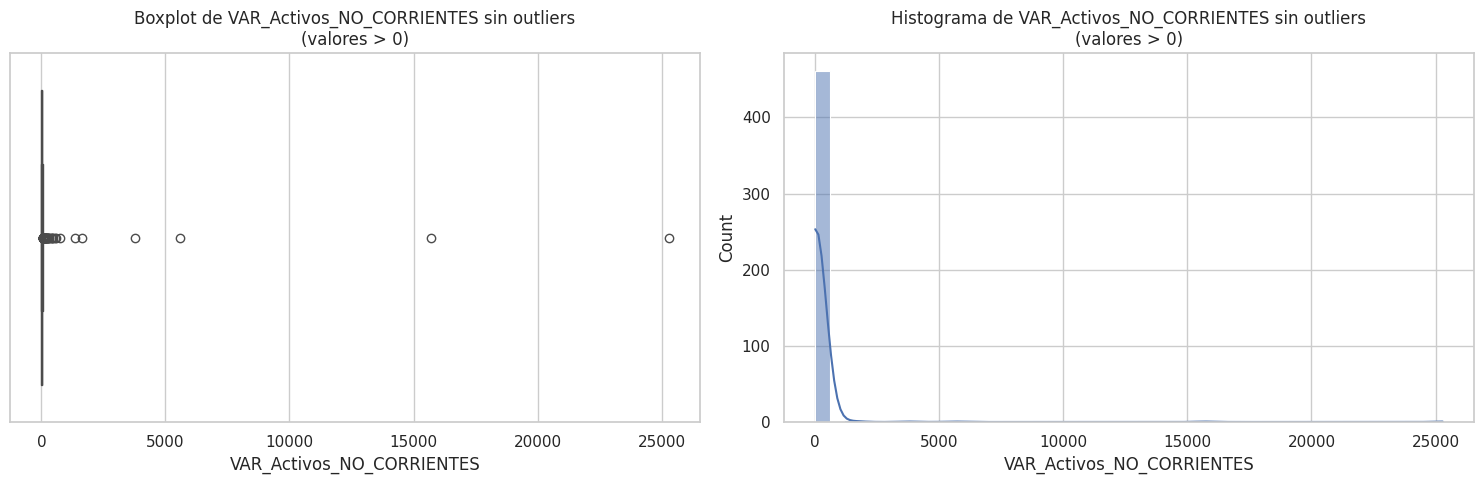

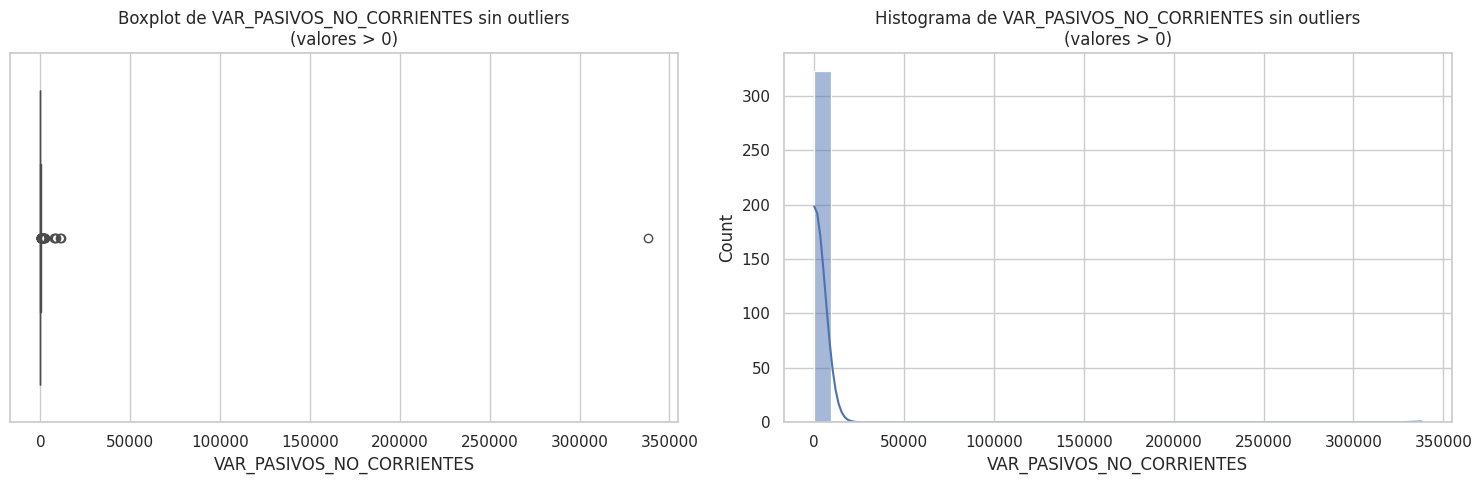

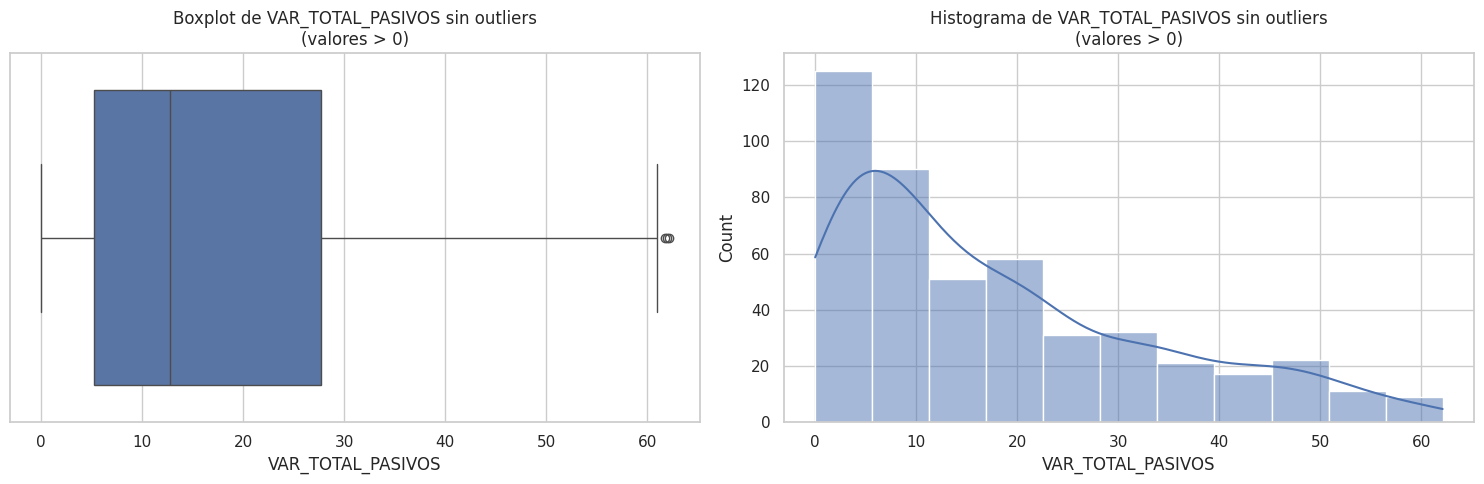

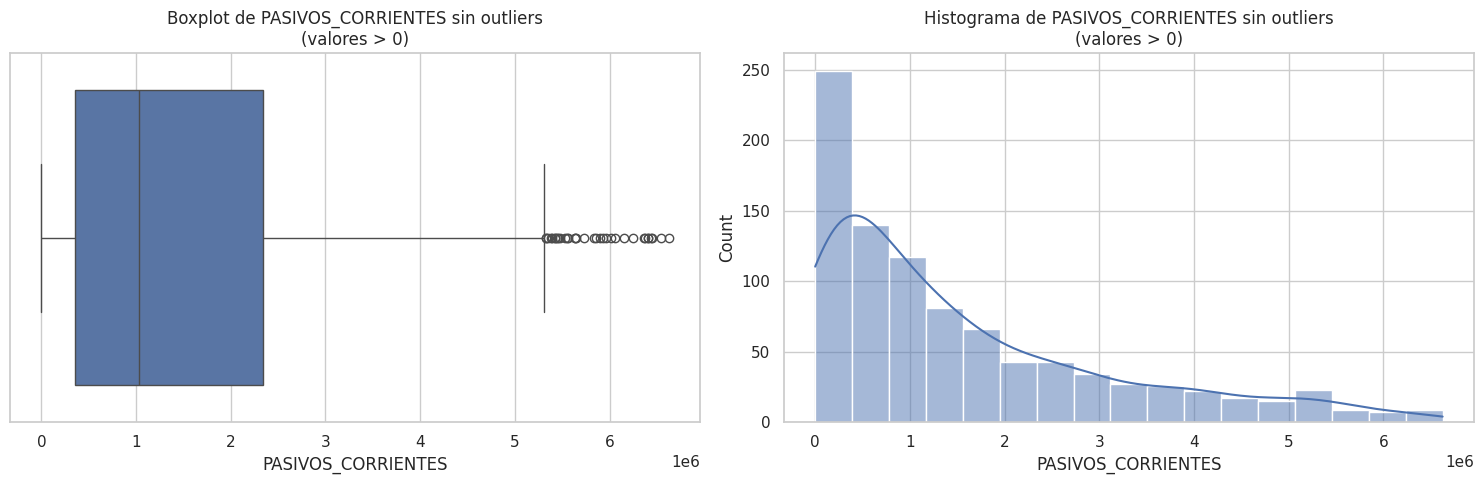

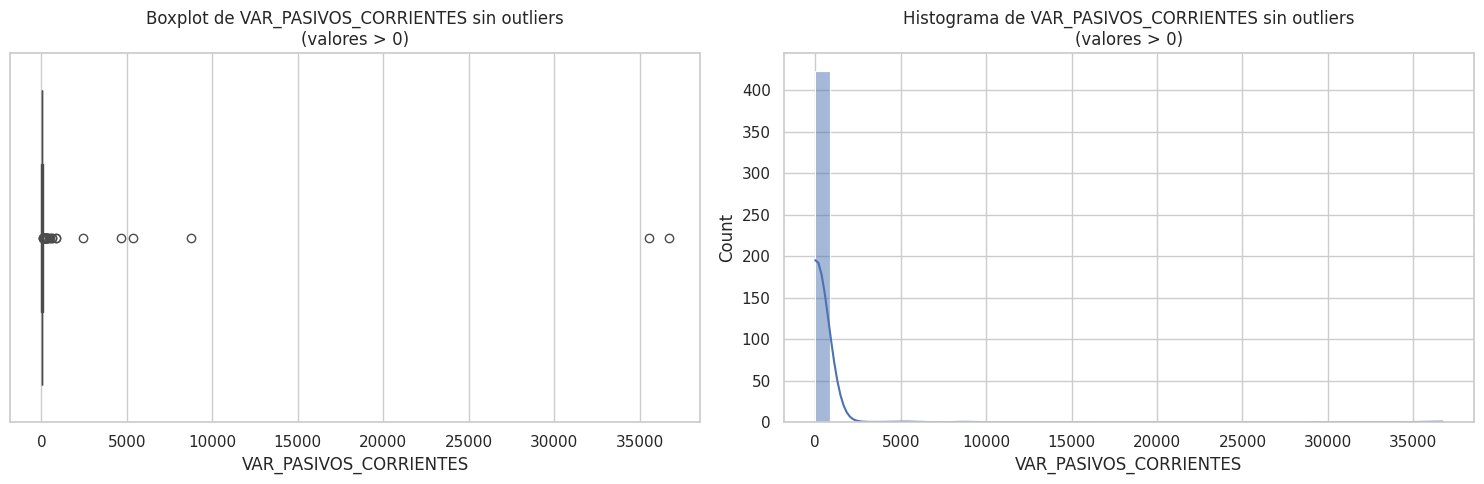

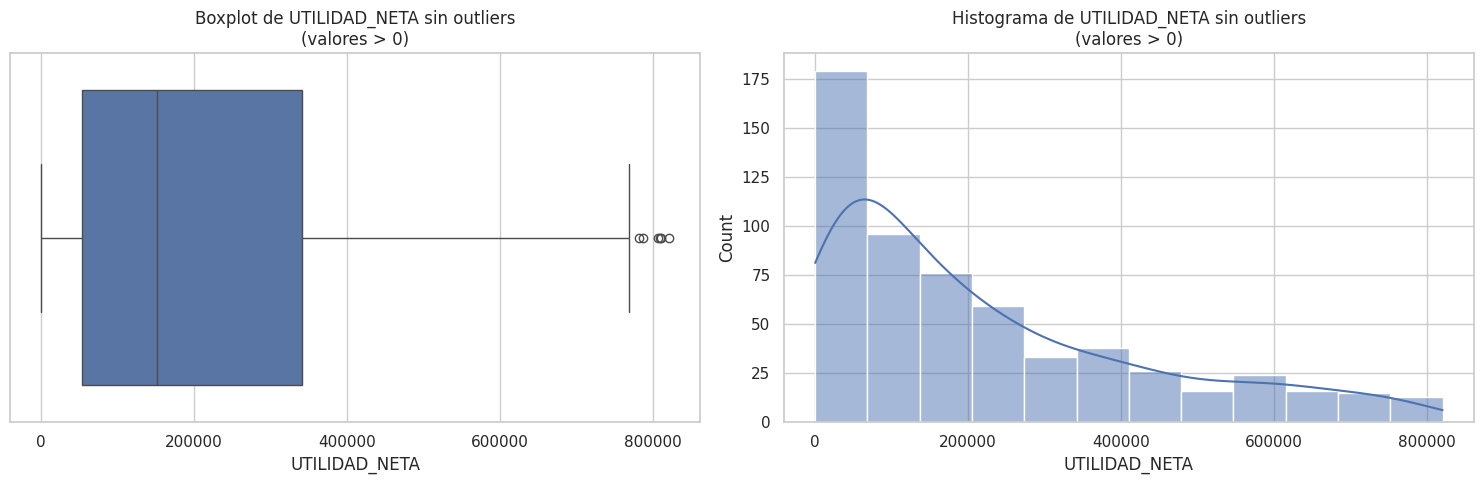

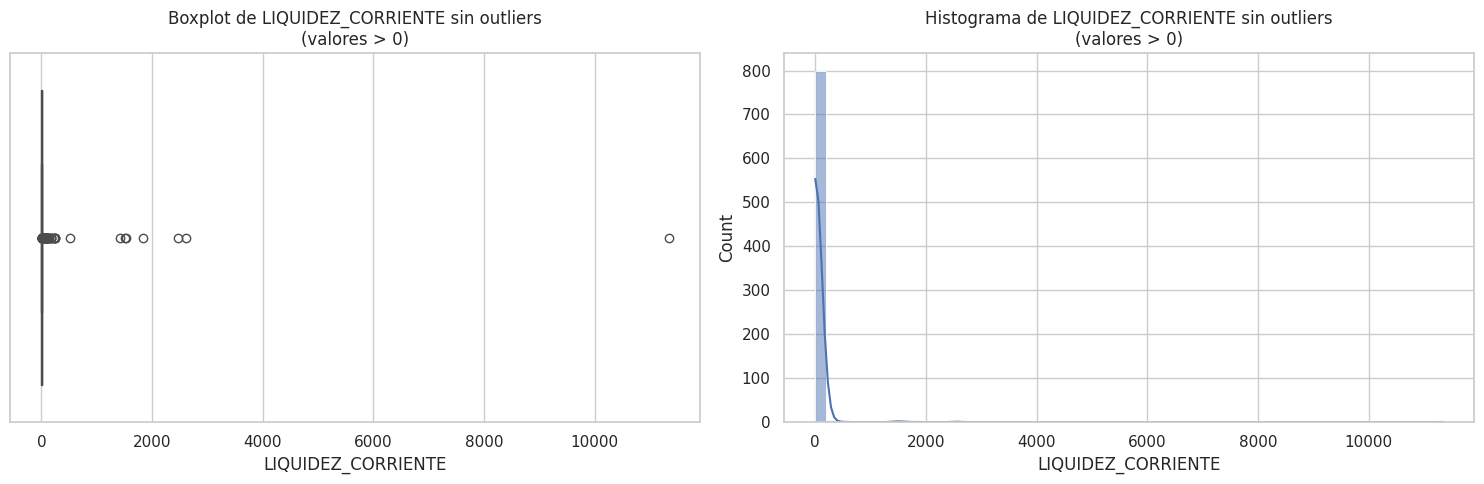

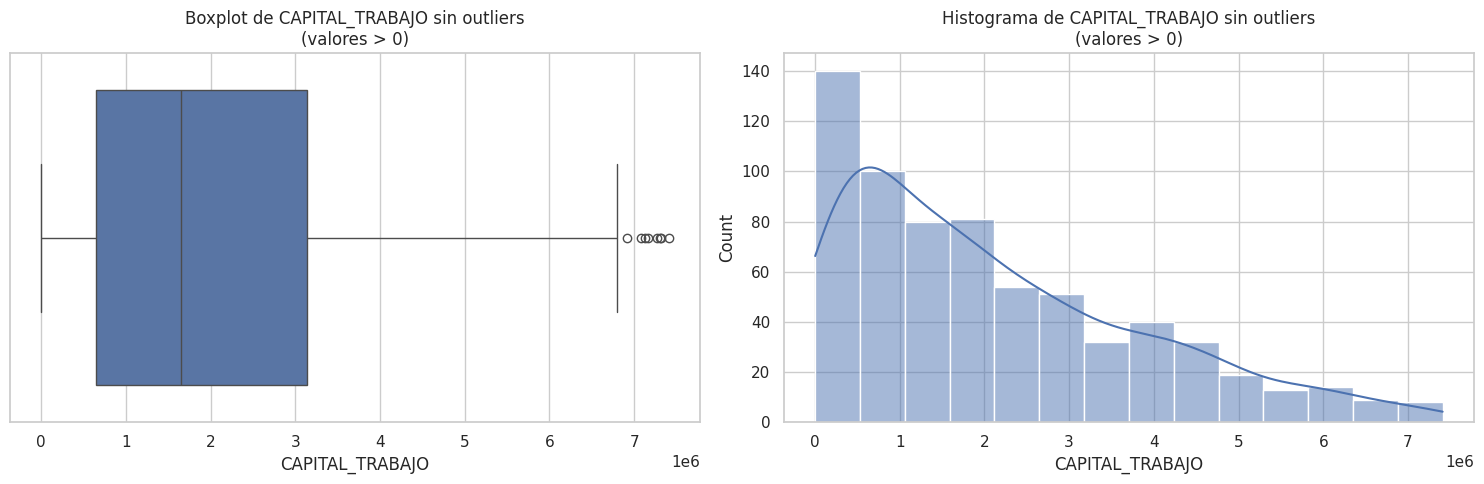

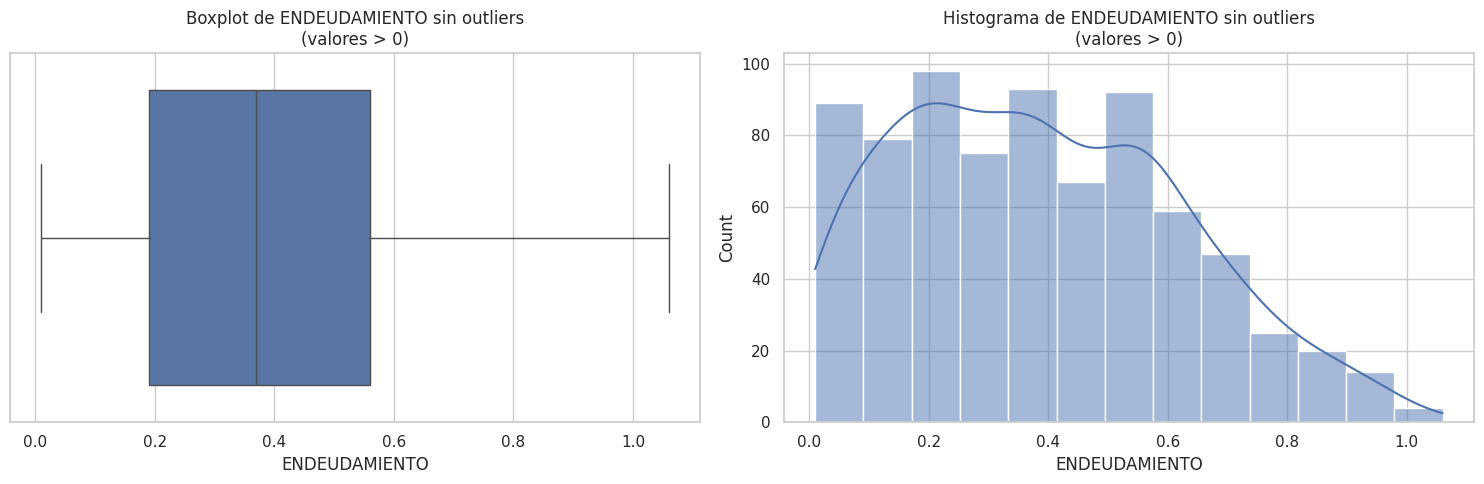

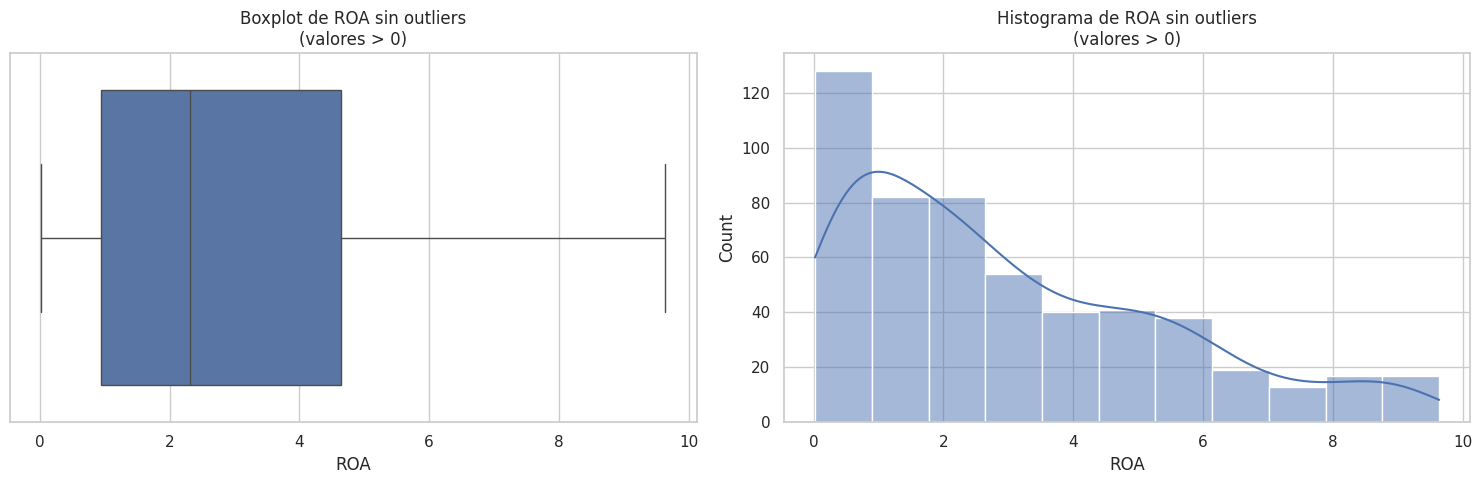

In [59]:
visualizar_distribucion(df_clientes,outliers=False)

### Variables Macroeconomicas

In [ ]:
df_variables = cargar_datos(datos_raw+"Variables_Macro.csv")
df_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha_cierre      912 non-null    object 
 1   smmlv             504 non-null    float64
 2   ipc               318 non-null    float64
 3   pib               243 non-null    float64
 4   tasa              328 non-null    float64
 5   var_pct_ipc_1m    912 non-null    float64
 6   var_pct_pib_1m    912 non-null    float64
 7   var_pct_tasa_1m   912 non-null    float64
 8   var_pct_smmlv_1m  912 non-null    float64
dtypes: float64(8), object(1)
memory usage: 64.3+ KB


In [72]:

convertir_fecha(df_variables,['fecha_cierre'])
df_variables = df_variables[df_variables['fecha_cierre']>='2018/01/01']

In [73]:
df_variables

,fecha_cierre,smmlv,ipc,pib,tasa,var_pct_ipc_1m,var_pct_pib_1m,var_pct_tasa_1m,var_pct_smmlv_1m
816,2018-01-31,781242.0,3.88,240660.33,19.25,-7.838480,2.309476,3.161844,5.899959
817,2018-02-28,781242.0,3.64,240660.33,18.60,-6.185567,2.309476,-3.376623,5.899959
818,2018-03-31,781242.0,3.45,240660.33,18.33,-5.219780,2.309476,-1.451613,5.899959
819,2018-04-30,781242.0,3.26,245160.60,18.16,-5.507246,1.869968,-0.927441,5.899959
820,2018-05-31,781242.0,3.24,245160.60,17.77,-0.613497,1.869968,-2.147577,5.899959
...,...,...,...,...,...,...,...,...,...
907,2025-08-31,1423500.0,NaN,NaN,NaN,-2.476190,1.464090,-1.192328,9.500000
908,2025-09-30,1423500.0,NaN,NaN,NaN,-2.476190,1.464090,-1.192328,9.500000
909,2025-10-31,1423500.0,NaN,NaN,NaN,-2.476190,1.464090,-1.192328,9.500000
910,2025-11-30,1423500.0,NaN,NaN,NaN,-2.476190,1.464090,-1.192328,9.500000


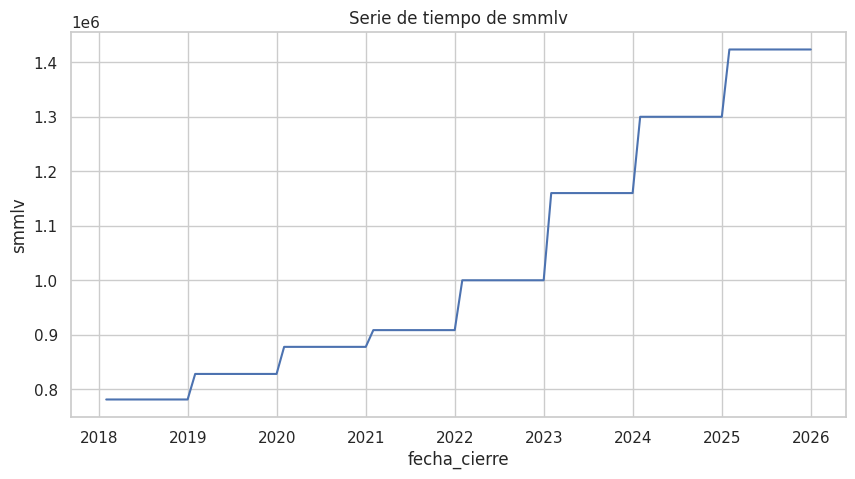

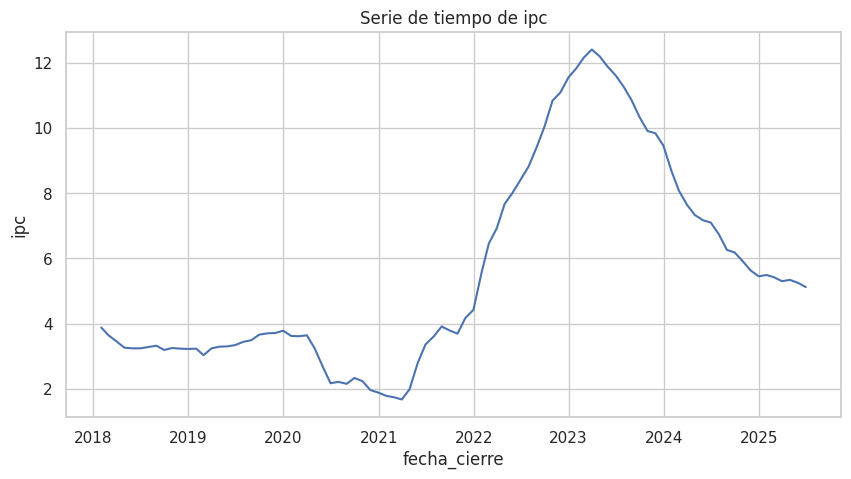

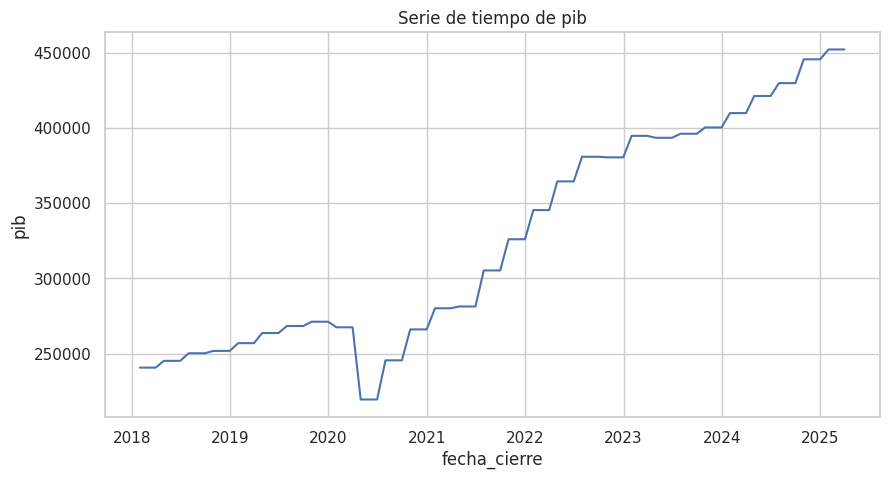

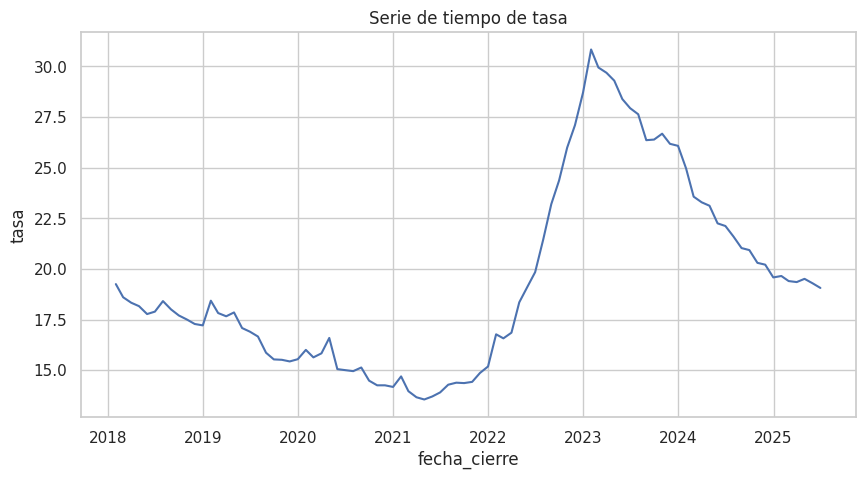

In [85]:
columnas = ['smmlv','ipc','pib','tasa']

for col in columnas:
    plt.figure(figsize=(10,5))
    sns.lineplot(df_variables,x='fecha_cierre',y=col,)
    plt.title(f'Serie de tiempo de {col}')
    plt.show

### Histórico de Cierres Mensuales de Facturación  

Este registro consolida los **cierres mensuales de facturación**, ofreciendo una visión detallada del estado de la cartera para cada cliente y negocio.  

El dataframe incluye información clave como:  
- **Días de mora acumulados** al cierre de cada periodo.  
- **Monto de la cuenta por cobrar**.  
- **Valor de deterioro** asociado.  
- **Calificación crediticia** asignada a cada cliente.  

Gracias a estos datos es posible:  
- Analizar el **comportamiento de pago** de los clientes.  
- Identificar **tendencias de riesgo** en la cartera.  
- Realizar un **seguimiento a la evolución histórica** de las cuentas por cobrar.  
- Apoyar la **toma de decisiones estratégicas** en gestión crediticia y análisis financiero.  

En resumen, este histórico se convierte en una herramienta clave para anticipar riesgos, optimizar la gestión de cartera y fortalecer la sostenibilidad financiera del negocio.  


In [ ]:
df_cierres = cargar_datos(datos_raw+'Historico_Cierres.csv')

df_cierres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13117 entries, 0 to 13116
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NIT                   13080 non-null  object 
 1   Mes informe           13117 non-null  int64  
 2   Cliente               13117 non-null  object 
 3   Fecha de Vencimiento  13117 non-null  object 
 4   Dias de Mora          13117 non-null  int64  
 5   Calificación          13117 non-null  object 
 6   Cuenta Por Cobrar     13117 non-null  float64
 7   % de Deterioro        13117 non-null  float64
 8   Valor de Deterioro    13117 non-null  float64
 9   FID                   13117 non-null  object 
 10  Fideicomiso           13117 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 1.1+ MB


In [ ]:
convertir_fecha(df_cierres,['Fecha de Vencimiento'])
df_cierres


,NIT,Mes informe,Cliente,Fecha de Vencimiento,Dias de Mora,Calificación,Cuenta Por Cobrar,% de Deterioro,Valor de Deterioro,FID,Fideicomiso
0,bda703a41ee55dcb911f17164009bc87636552bd5a641b...,202301,2fd44f99ebb5f4779baa8f8c3c18b8aa3778395b58c9bf...,2022-09-15,0,A,2380000.00,0.0022,5236.00,b527ab75d12cba5a48db8e39b6dc776fafe8d0a64454c1...,ef41b40f72aabddd7491277f62e2d14d7f8126b6c06831...
1,a6f8bc5c429a36aba24d818a811da81ef5f66107c131f4...,202301,ddbb7aaaf540b1d826fe0a1b86d885bce851a6a10b17c1...,2023-02-28,0,A,0.00,0.0022,0.00,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,c7b36740e4a4084fabf1f8fe801822e3c638dcc964917a...
2,f810167a3f88559f1cf90ac412c7d70c0de7f54742bcad...,202301,e7f467d21e1ae519b47b15c10f7de9368ada74e51d0e90...,2023-02-28,0,A,0.00,0.0022,0.00,eaab7f29f0ebeeb28a5fcae7dba2f7b07bf2fa942bab4b...,f1cb9ef1cdaf60372aaecc67cf18b3e0faaec12172234f...
3,c8ad84d88132c613b3343688e13ada573e8976d18b58ec...,202301,e9485dbb84aae5eb13fc27277fe3632c880ce13cf5c847...,2023-02-28,0,A,0.00,0.0022,0.00,aa6df8861c8ad85418960d463c1bfff2ec9d257d58e5ab...,1fc58270cf6d565f7721f33a604319fd0fed003c975329...
4,22a66f087c21865bab019d89cc8a7f328d7020e9bcd717...,202301,30976b83fed3f372533fa798d28600e70c3afc2db43d26...,2023-02-28,0,A,0.00,0.0022,0.00,22a725be4cbf11a95514f3c8e93885502034dfc44b52a2...,dfbe8cbeeca35fc3e79319d0ce9094df25966e94cef76b...
...,...,...,...,...,...,...,...,...,...,...,...
13112,93c7e29096be6b295b082af5134f6d6ccb70a4f5bd8186...,202506,17650896ef43b169e901acaa62cb855cac7321374b0cb6...,2023-12-17,561,E,36421600.00,1.0000,36421600.00,79c34e61bb9da63b9bb88d87c02a531d8af9ed16d85c22...,9086a8cb49a638fd91aa65fcecbf4b0191676af688006d...
13113,56b6928bdc3879ed19779d840c562e5406d9b29d2cca32...,202506,e8487cee0f1f1eb12194f76c3c112df3fb464107e18176...,2024-03-21,466,E,49906220.00,1.0000,49906220.00,136a27f6f0fd70909720b12ee3519e5aaedfbbfbbce1da...,bef3355fad40e53dfa569c024c4726cccf0aad57117677...
13114,f495b5a0005d360b2a2c3e358b2d7973c0b3e7a76e371d...,202506,0ba0a24918ff17545c50367b9ec234ddb4750355bf309f...,2022-11-11,962,E,13042400.00,1.0000,13042400.00,8005c981fac40b3ab78dc2d9271bed69f4f8b9d1e18686...,bc2b41be291e29ad0365793979794a9298b5c23ce642f5...
13115,fbbabd04e6dd67e5db8b9bb554145338c77d7415d5f620...,202506,5649133df6d8b3b7de7cf57c7c4a3b14df6ef95b05dd36...,2020-11-14,1689,E,2383943.36,1.0000,2383943.36,9ac073a07be208df6fa2ee0e4ce2a1e66c3e7156772228...,85e0c73f18242dc15a1886644a3cd2a953209312e2ecfb...


In [ ]:
revision_inicial(df_cierres)

Cantidad de observaciones: 13117
Primeras filas del DataFrame:
                                                 NIT  Mes informe  \
0  bda703a41ee55dcb911f17164009bc87636552bd5a641b...       202301   
1  a6f8bc5c429a36aba24d818a811da81ef5f66107c131f4...       202301   
2  f810167a3f88559f1cf90ac412c7d70c0de7f54742bcad...       202301   
3  c8ad84d88132c613b3343688e13ada573e8976d18b58ec...       202301   
4  22a66f087c21865bab019d89cc8a7f328d7020e9bcd717...       202301   

                                             Cliente Fecha de Vencimiento  \
0  2fd44f99ebb5f4779baa8f8c3c18b8aa3778395b58c9bf...           2022-09-15   
1  ddbb7aaaf540b1d826fe0a1b86d885bce851a6a10b17c1...           2023-02-28   
2  e7f467d21e1ae519b47b15c10f7de9368ada74e51d0e90...           2023-02-28   
3  e9485dbb84aae5eb13fc27277fe3632c880ce13cf5c847...           2023-02-28   
4  30976b83fed3f372533fa798d28600e70c3afc2db43d26...           2023-02-28   

   Dias de Mora Calificación  Cuenta Por Cobrar  % de Deter

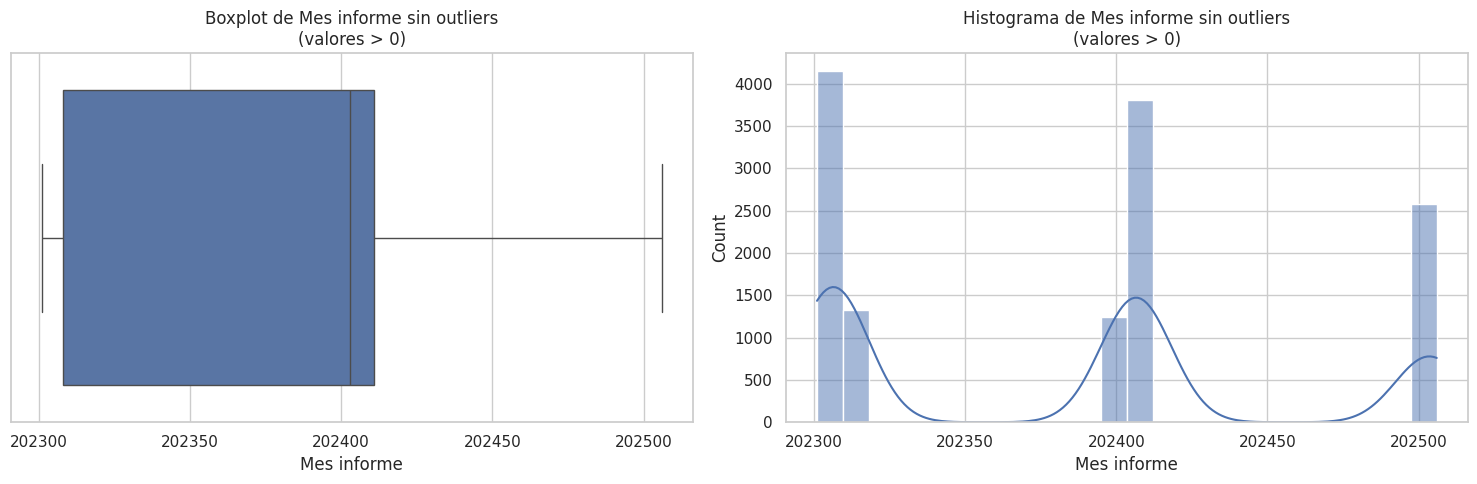

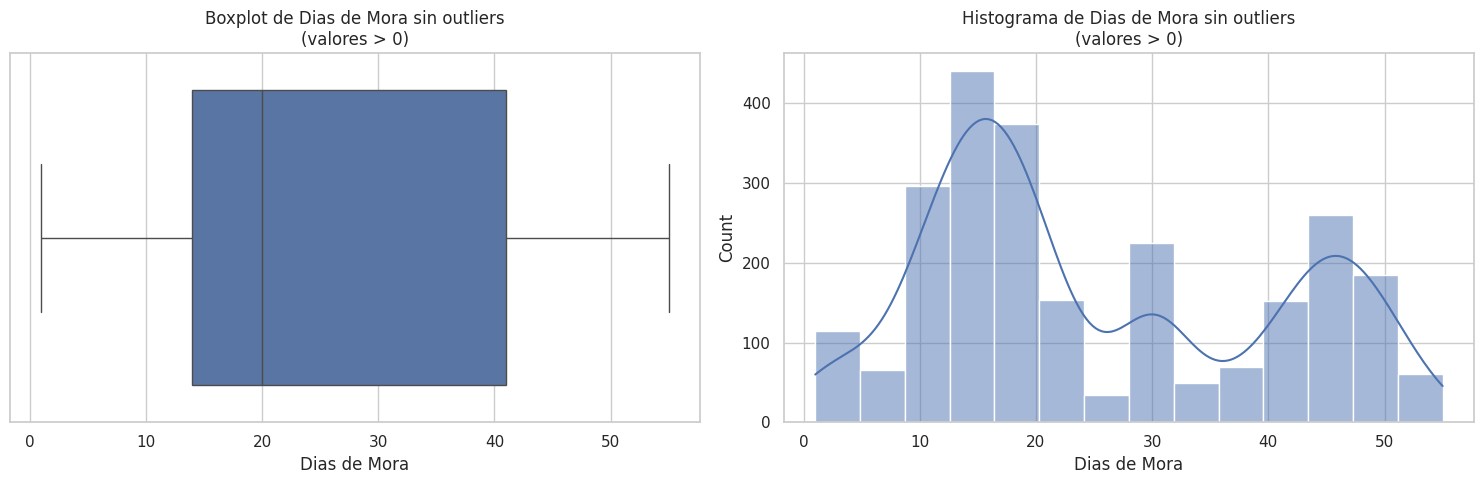

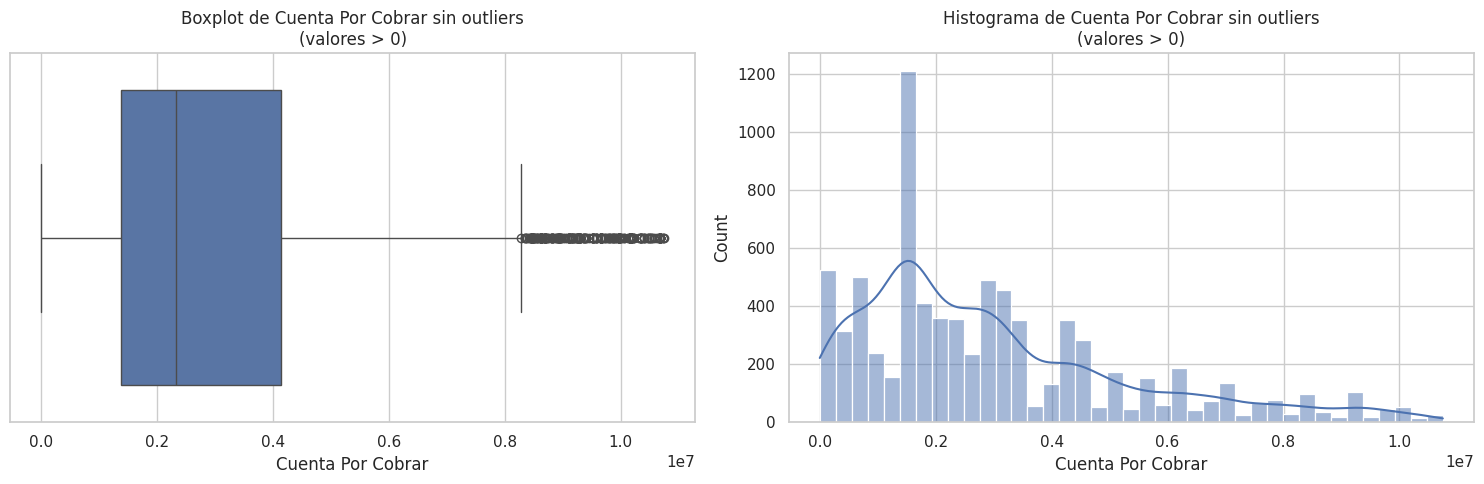

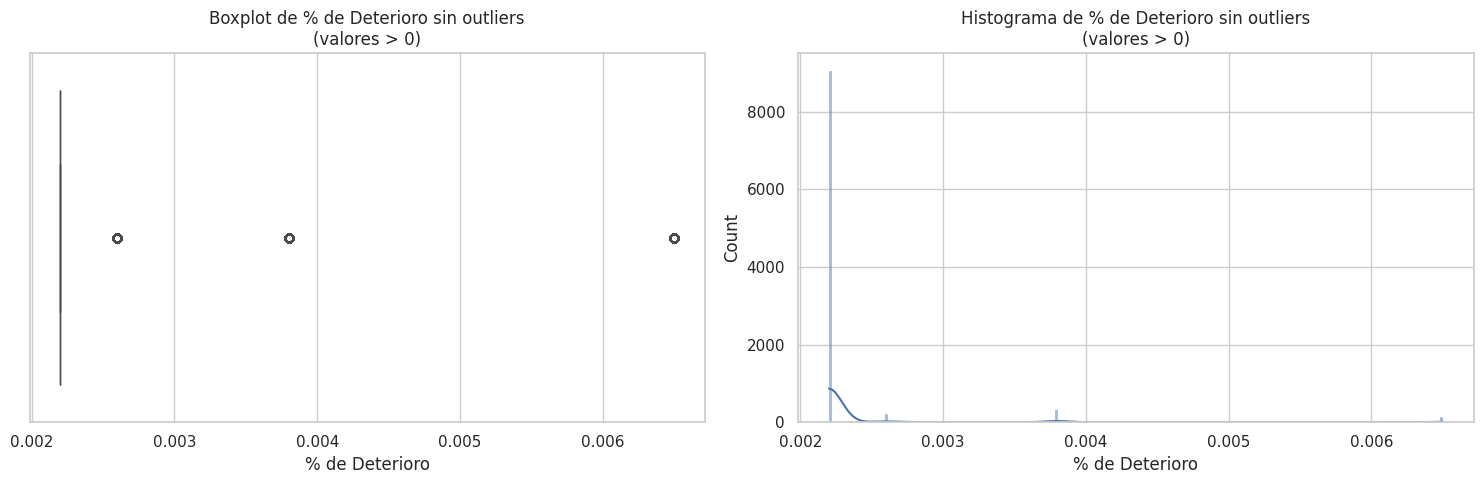

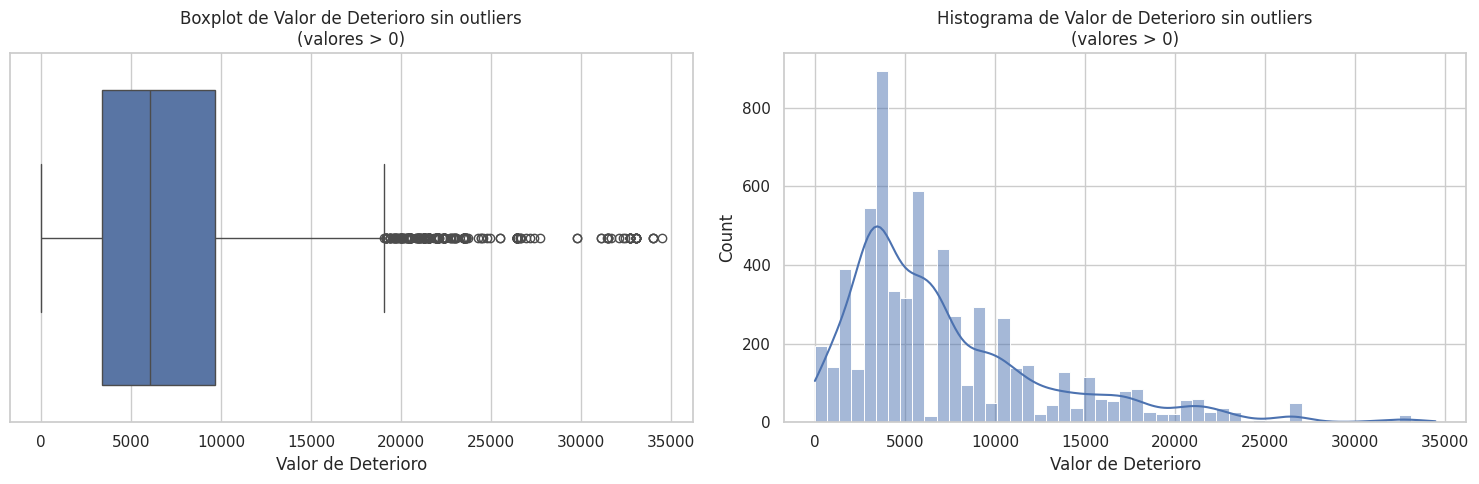

In [ ]:
visualizar_distribucion(df_cierres, outliers=False)

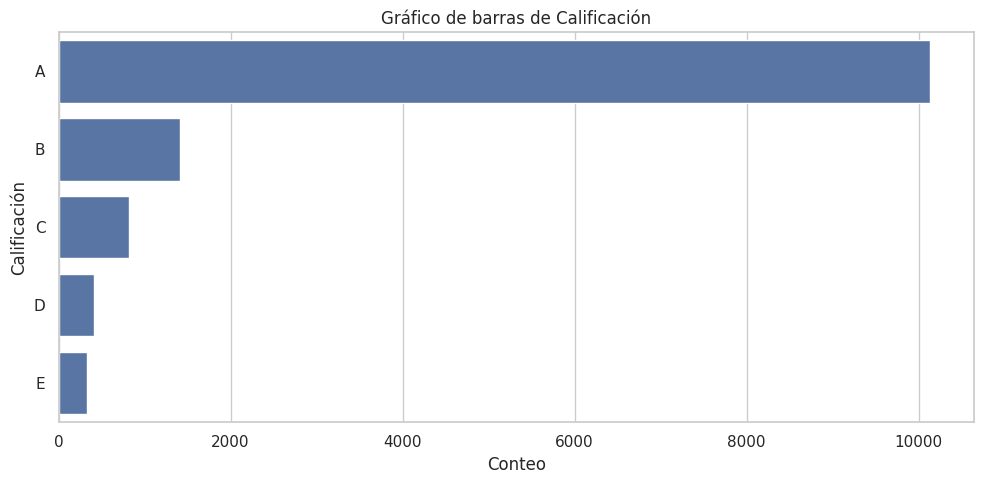

In [ ]:
visualizar_categoricas(df_cierres,['Calificación'])